### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons

- less expensive restaurants (under \\$20),
- coffee houses,
- carry out & take away,
- bar, and
- more expensive restaurants (\\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [68]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [69]:
data = pd.read_csv('data/coupons.csv')

In [70]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [71]:
#rename column passanger to passenger
data = data.rename(columns={'passanger': 'passenger'})
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   destination           12684 non-null  str  
 1   passenger             12684 non-null  str  
 2   weather               12684 non-null  str  
 3   temperature           12684 non-null  int64
 4   time                  12684 non-null  str  
 5   coupon                12684 non-null  str  
 6   expiration            12684 non-null  str  
 7   gender                12684 non-null  str  
 8   age                   12684 non-null  str  
 9   maritalStatus         12684 non-null  str  
 10  has_children          12684 non-null  int64
 11  education             12684 non-null  str  
 12  occupation            12684 non-null  str  
 13  income                12684 non-null  str  
 14  car                   108 non-null    str  
 15  Bar                   12577 non-null  str  
 16  CoffeeHouse    

In [72]:
# check ranges of numerical columns
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
data['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [74]:
# Value counts for each column to identify problematic data
nan_cols = []
for column in data.columns:
    unique_vals = data[column].value_counts(dropna=False)
    # check if Nan is in the value counts
    if pd.isna(unique_vals.index).any():
        # uncomment below to see unique values
        # print(f"Value counts for column '{column}':")
        print(f"Column '{column}' has missing values:")
        # print(unique_vals)
        nan_cols.append(column)

print(f"Columns with missing values: {nan_cols}")

Column 'car' has missing values:
Column 'Bar' has missing values:
Column 'CoffeeHouse' has missing values:
Column 'CarryAway' has missing values:
Column 'RestaurantLessThan20' has missing values:
Column 'Restaurant20To50' has missing values:
Columns with missing values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']


In [75]:
# drop rows with values missing in columns 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
data_cleaned = data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'])
# replace Nan in column car with 'Not specified'
data_cleaned['car'] = data_cleaned['car'].fillna('Not specified')

4. What proportion of the total observations chose to accept the coupon?



In [76]:
# The acceptance of the coupon is indicated by the 'Y' column, where 1 means accepted and 0 means not accepted.
acceptance_rate = data_cleaned['Y'].mean()
print(f"Proportion of observations that accepted the coupon: {acceptance_rate:.2%}")
# in the original data there were no Nan's in the Y column, so for interest lets callculate the acceptance rate there too
original_acceptance_rate = data['Y'].mean()
print(f"Proportion of observations that accepted the coupon in the original data: {original_acceptance_rate:.2%}")

Proportion of observations that accepted the coupon: 56.93%
Proportion of observations that accepted the coupon in the original data: 56.84%


5. Use a bar plot to visualize the `coupon` column.

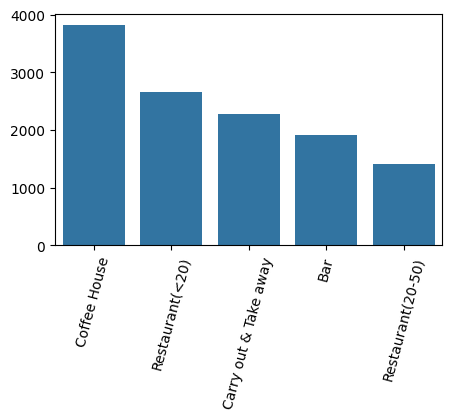

In [77]:

plt.figure(figsize=(5,3))
plt.xticks(rotation=75)
ax = sns.barplot(x=data_cleaned['coupon'].value_counts().index, y=data_cleaned['coupon'].value_counts().values)
ax.set_xlabel('')
plt.show()

6. Use a histogram to visualize the temperature column.

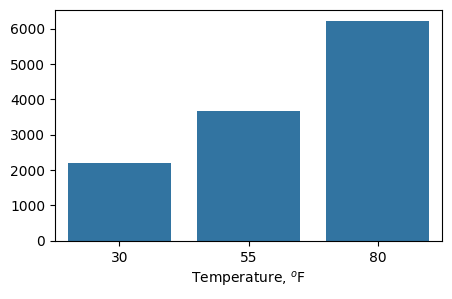

In [78]:
plt.figure(figsize=(5,3))
ax = sns.barplot(x=data_cleaned['temperature'].value_counts().index, y=data_cleaned['temperature'].value_counts().values)
ax.set_xlabel('Temperature, $^o$F')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [79]:
df_bar = data_cleaned[data_cleaned['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [89]:
print(float(df_bar['Y'].mean())*100)

41.19184526921067


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [81]:
df_bar.groupby(df_bar['Bar'].apply(lambda x: '3 or fewer' if x in ['never', 'less1', '1to3'] else 'more than 3'))['Y'].mean()


Bar
3 or fewer     0.295302
more than 3    0.685315
Name: Y, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [82]:
rate1 = df_bar.query("Bar in ['4to8', 'gt8'] and age not in ['below21', '21to25']")['Y'].mean()
rate2 = df_bar.query("not (Bar in ['4to8', 'gt8'] and age not in ['below21', '21to25'])")['Y'].mean()
print(f"Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: {rate1:.1%}")
print(f"Acceptance rate for all other drivers: {rate2:.1%}")


Acceptance rate for drivers who go to a bar more than once a month and are over the age of 25: 73.8%
Acceptance rate for all other drivers: 40.5%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [83]:
df_bar['occupation'].unique()

<StringArray>
[               'Architecture & Engineering',
                                   'Student',
                'Education&Training&Library',
                                'Unemployed',
                        'Healthcare Support',
      'Healthcare Practitioners & Technical',
                           'Sales & Related',
                                'Management',
  'Arts Design Entertainment Sports & Media',
                   'Computer & Mathematical',
              'Life Physical Social Science',
                   'Personal Care & Service',
           'Office & Administrative Support',
                 'Construction & Extraction',
                                     'Legal',
                                   'Retired',
               'Community & Social Services',
         'Installation Maintenance & Repair',
          'Transportation & Material Moving',
                      'Business & Financial',
                        'Protective Service',
        'Food Prepar

In [85]:
rate3 = df_bar.query("Bar in ['4to8', 'gt8'] and passenger != 'Kid(s)' and occupation not in ['Farming Fishing & Forestry']")['Y'].mean()
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: {rate3:.1%}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 71.1%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [86]:
data_cleaned['income'].unique()

<StringArray>
[ '$62500 - $74999',  '$12500 - $24999',  '$75000 - $87499',
  '$50000 - $62499',  '$37500 - $49999',  '$25000 - $37499',
  '$100000 or More',  '$87500 - $99999', 'Less than $12500']
Length: 9, dtype: str

In [87]:
rate4 = df_bar.query("(Bar in ['4to8', 'gt8'] and passenger != 'Kid(s)' and maritalStatus != 'Widowed')")['Y'].mean()
rate5 = df_bar.query("(Bar in ['4to8', 'gt8'] and age in ['below21', '21to25', '26to30'])")['Y'].mean()
rate6 = data_cleaned.query("(RestaurantLessThan20 in ['4to8', 'gt8'] and income in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])")['Y'].mean()
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {rate4:.1%}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {rate5:.1%}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {rate6:.1%}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.1%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 50.0%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 66.3%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  